In [1]:
import numpy as np
import pandas as pd
from plotnine import *
from scipy.stats import binom, uniform

$\DeclareMathOperator*{\MEAN}{\mathbf{E}}$
$\DeclareMathOperator*{\VARIANCE}{\mathbf{D}}$
$\newcommand{\mean}[1]{\MEAN\left[#1\right]}$
$\newcommand{\variance}[1]{\VARIANCE\left[#1\right]}$
$\newcommand{\prob}[1]{\Pr\left[#1\right]}$
$\newcommand{\accuracy}{Acc}$
$\newcommand{\precision}{Prec}$
$\newcommand{\recall}{Rec}$

## Õigsuse lähendi relatiivne viga

Lisaks ligikaudse väärtuse absoluutsele veale kasutatakse lähendi headuse mõõtmiseks relatiivset viga.
Õigsuse lähendi relatiivse vea keskväärtus ja dispersioon avalduvad järgnevalt
\begin{align*}
    \mean{\frac{\widehat{\accuracy}}{\accuracy}-1}&=\frac{1}{\accuracy}\cdot\mean{\widehat{\accuracy}}-1=1-1=0 \nonumber\enspace, \\
    \variance{\frac{\widehat{\accuracy}}{\accuracy}-1}&=\frac{1}{\accuracy^2}\cdot\frac{\accuracy\cdot(1-\accuracy)}{N}=\frac{1}{N}\cdot\frac{1-\accuracy}{\accuracy} \enspace.
\end{align*}
Uurides lähendi relatiivse ja absoluutse vea hajuvuse suhet
\begin{equation*}
    \variance{\frac{\widehat{\accuracy}}{\accuracy}} : \variance{\widehat{\accuracy}-\accuracy}=
    \left( \frac{1}{N}\cdot\frac{1-\accuracy}{\accuracy} \right) : \left( \frac{1}{N}\cdot \accuracy\cdot(1-\accuracy) \right)=\frac{1}{\accuracy^2} \enspace,
\end{equation*}
selgub, et kõrge õigsuse korral on õigsuse lähendi vead ligikaudu sama hajuvusega.

Nagu absoluutse veahinnagu puhul on ka relatiivse veahinnangu puhul eesmärk seda absoluutväärtuselt minimeerida.
Seega võib küsida kui suurt valimit läheb vaja, et piisavalt suure kindlusega oleks relatiivne viga võimalikult väike.

Õigsuse lähend sisaldab binoomjaotusega juhuslikku suurst.
Järelikult on võimalik relatiivset viga tõenäosuslikult hinnata kasutades binoomjaotue omadusi.
Lähtudes võrrandist
\begin{equation}
    \label{eq:binoomjaotus relatiivne viga}
    \prob{\left|\frac{\widehat{\accuracy}}{\accuracy}-1\right|\geq\varepsilon}=\alpha \enspace,
\end{equation}
millest tõenäosusmärgi aluses võrratuses eraldada binoomjaotusega juhusliku suuruse $S_N$ ühele poole võrratusemärki
\begin{align*}
    \prob{S_N \leq N \cdot \accuracy \cdot (1-\varepsilon)} &= \frac{\alpha}{2} \enspace, \\
    \prob{S_N <    N \cdot \accuracy \cdot (1+\varepsilon)} &= 1 - \frac{\alpha}{2} \enspace,
\end{align*}
avalduvad olulisusele vastavad prtosendipunktid kujul
\begin{align*}
    q_1 &= N \cdot \accuracy \cdot (1-\varepsilon) \enspace, \\
    q_2 &= N \cdot \accuracy \cdot (1+\varepsilon) \enspace.
\end{align*}

Relatiivse vea tõkkeks $\varepsilon$ on valitud suurem protsendipunktide põhjal avalduv veahinnang
\begin{equation*}
    \varepsilon = \max \left( 1 - \frac{q_1}{N\cdot\accuracy} , \frac{q_2}{N\cdot\accuracy} - 1 \right) \enspace.
\end{equation*}
Tulemuse põhjal saab arvutada valimi vajalikud suurused olulisuse suhtes.


| $\accuracy$ | $\varepsilon = 10\%$ | $\varepsilon = 1\%$ | $\varepsilon = 0.1\%$ |
|-------------|----------------------|---------------------|-----------------------|
| $70\%$      | $161$                | $16331$             | $1646727$             |
| $90\%$      | $53$                 | $4176$              | $425856$              |
| $95\%$      | $3$                  | $1926$              | $202223$              |

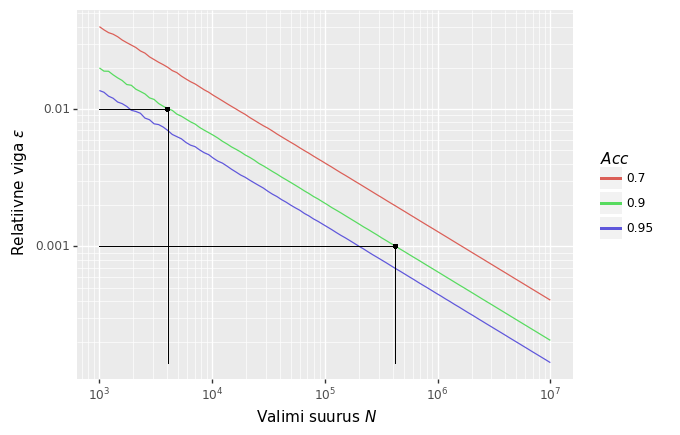

<ggplot: (155300787113)>

In [2]:
N = np.round(np.logspace(3, 7, 100), 0)  # binom.ppf() ei salli komakohti ???
tõenäosused = .7, .9, .95

read = [
    (
        p, n, max(1 - binom.ppf(q=0.025, p=p, n=n) / (n * p), binom.ppf(q=1-0.025, p=p, n=n)) / (n * p) - 1
    ) for p in tõenäosused for n in N
]
df = pd.DataFrame(read, columns=['tõenäosus', 'n', 'epsilon'])

p90 = df.query('tõenäosus == .9')
n_p90_e01 = p90.iloc[np.abs(p90['epsilon'] - .01).argmin()]['n']
n_p90_e001 = p90.iloc[np.abs(p90['epsilon'] - .001).argmin()]['n']
eps_min = df['epsilon'].min()

g = (
    ggplot(df) +
    scale_x_log10(breaks=np.logspace(3, 7, 5), labels=['$10^3$','$10^4$', '$10^5$', '$10^6$', '$10^7$']) +
    scale_y_log10(breaks=np.logspace(-3, -1, 3)) +
    labs(x='Valimi suurus $N$', y='Relatiivne viga $\\varepsilon$') +
    guides(color=guide_legend(title='$Acc$')) +

    geom_line(aes('n', 'epsilon', group='tõenäosus', color='pd.Categorical(tõenäosus)')) +
    
    geom_segment(aes(x=1e3, y=.01, xend=n_p90_e01, yend=.01), size=.25, color="black", show_legend=False) +
    geom_segment(aes(x=1e3, y=.001, xend=n_p90_e001, yend=.001), size=.25, color="black", show_legend=False) +
    geom_segment(aes(x=n_p90_e01, y=eps_min, xend=n_p90_e01, yend=.01), size=.25, color="black", show_legend=False) +
    geom_segment(aes(x=n_p90_e001, y=eps_min, xend=n_p90_e001, yend=.001), size=.25, color="black", show_legend=False) +
    
    geom_point(aes(x='n_p90_e01', y='.01'), size=0.75, color="black", show_legend=False) +
    geom_point(aes(x='n_p90_e001', y='.001'), size=0.75, color="black", show_legend=False)
)

# g.save('./joonised/binoomjaotus_relatiivne_viga.png', dpi=100)
g

Tabelis ja joonisel on esitatud valimi vajalikud suurused meetodi oletatud õigsuse ja relatiivse veahinnangu soovitud suuruse suhtes binoomjaotuse omaduste põhjal kindlusega $95\%$.